In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
from subprocess import check_call

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv")#, header=None, names=col_names)

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [195]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train.head()
y_train.head()

88     1
467    0
550    0
147    0
481    0
Name: Outcome, dtype: int64

In [144]:
# Create Decision Tree classifer object
# Entropy with max_depth 4 gives the best accuracy.
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=2,min_samples_leaf=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7878787878787878


In [140]:
dot_data = StringIO()
export_graphviz(clf, out_file='file.dot',  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
check_call(['dot','-Tpng','file.dot','-o','file.png'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
#Image(graph.create_png())
#graph.create_png()

0

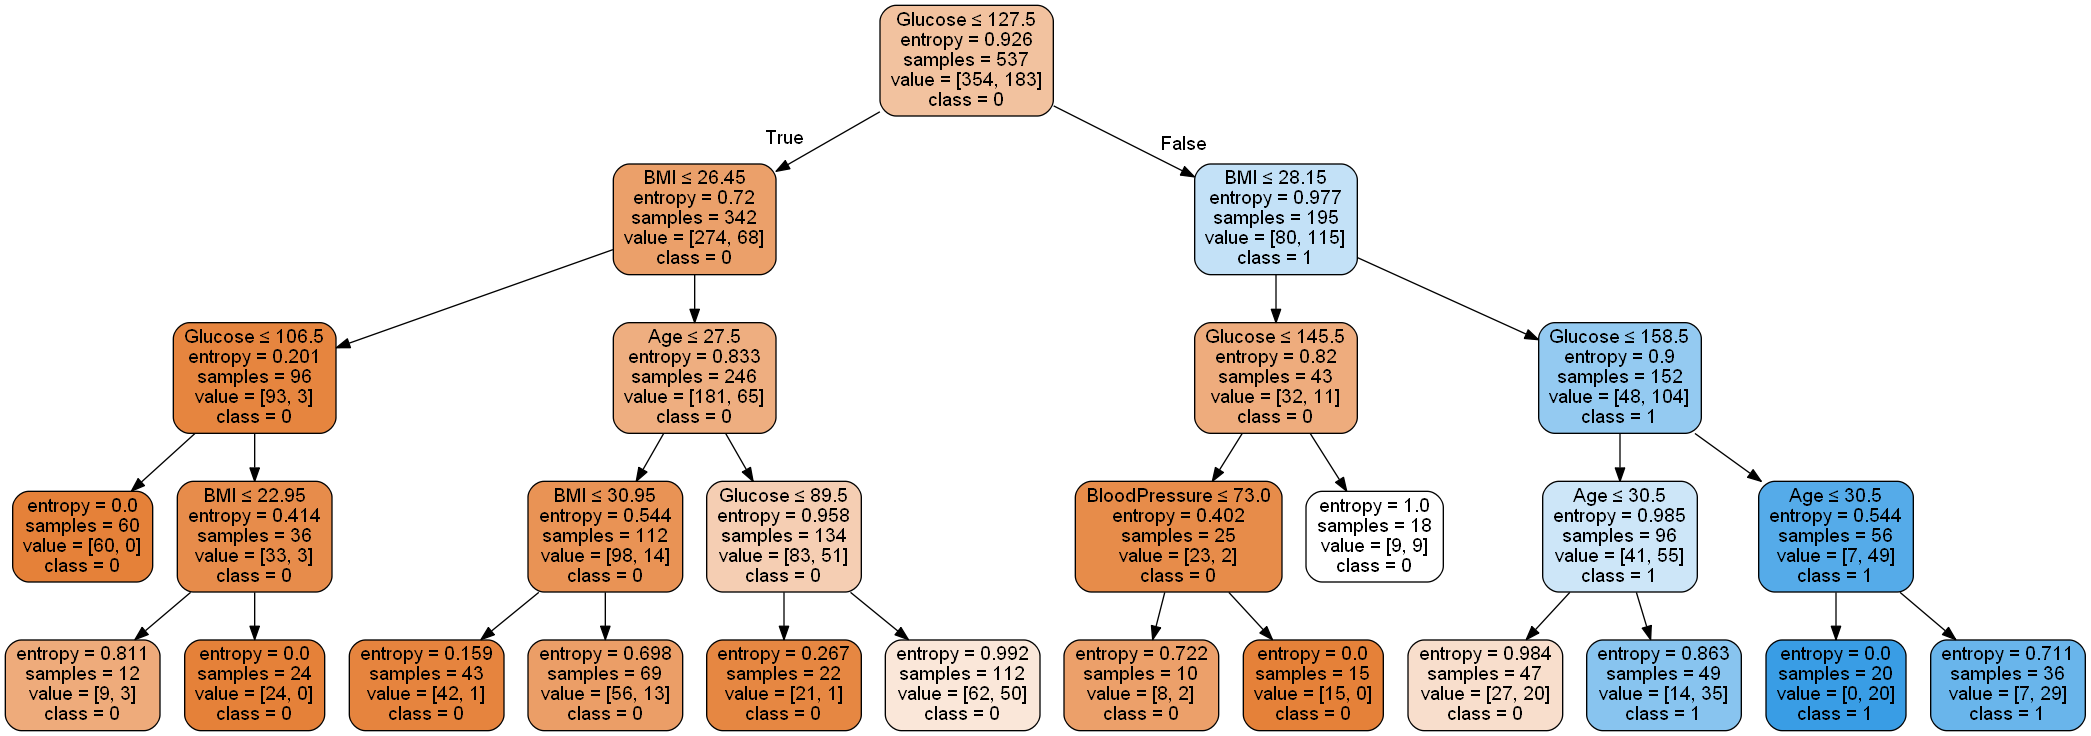

In [125]:
Image('file.png')

In [145]:
from sklearn.ensemble import RandomForestClassifier


In [185]:
clf = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=100)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7748917748917749


In [190]:
dot_data = StringIO()
export_graphviz(clf.estimators_[6]
, out_file='file.dot',  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
check_call(['dot','-Tpng','file.dot','-o','file.png'])

0

In [191]:

clf.estimators_[6]

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=107714083, splitter='best')

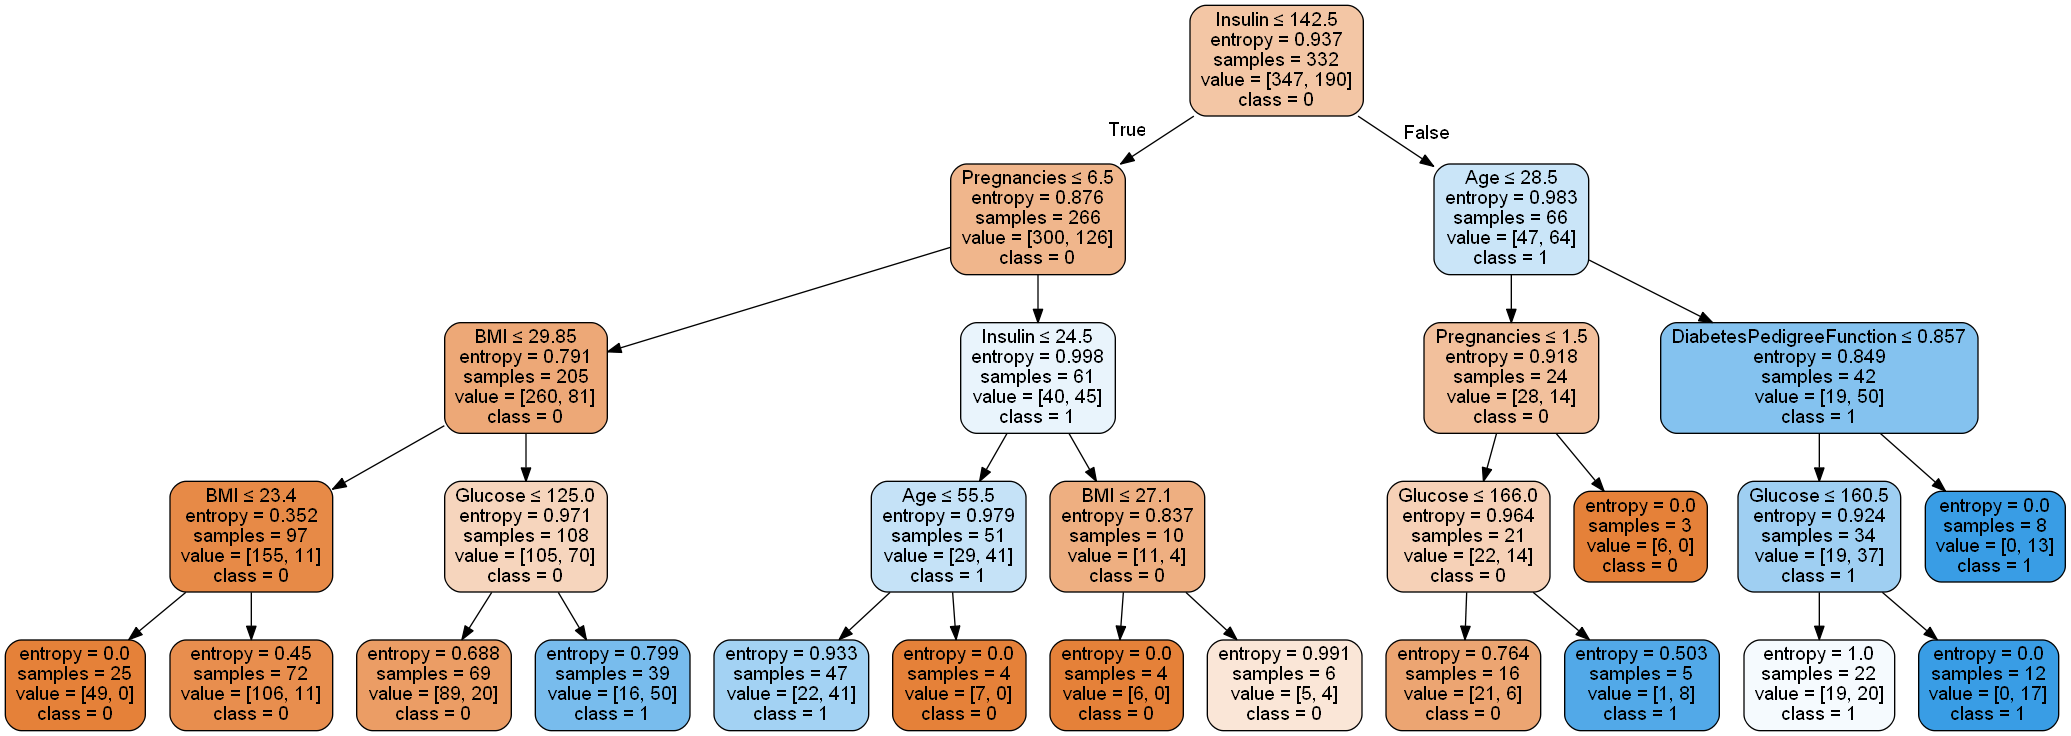

In [192]:
Image('file.png')